# Projet Machine learning (Prédiction)
**Abdeljabbar RACHID**

In [12]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
abalone = fetch_ucirepo(id=1)
Abalone = pd.DataFrame(abalone.data.features)
Abalone['Rings'] = abalone.data.targets

pd.DataFrame(abalone.variables)

,name,role,type,demographic,description,units,missing_values
0,Sex,Feature,Categorical,None,"M, F, and I (infant)",None,no
1,Length,Feature,Continuous,None,Longest shell measurement,mm,no
2,Diameter,Feature,Continuous,None,perpendicular to length,mm,no
3,Height,Feature,Continuous,None,with meat in shell,mm,no
4,Whole_weight,Feature,Continuous,None,whole abalone,grams,no
5,Shucked_weight,Feature,Continuous,None,weight of meat,grams,no
6,Viscera_weight,Feature,Continuous,None,gut weight (after bleeding),grams,no
7,Shell_weight,Feature,Continuous,None,after being dried,grams,no
8,Rings,Target,Integer,None,+1.5 gives the age in years,None,no


## **Description du jeu de données Abalone**
**Objectif :**

Prédire l'âge d'un ormeau en fonction de mesures physiques, en utilisant le nombre d'anneaux ("Rings") comme indicateur d'âge.

**Nombre d'observations :**  4 177 obs.

**Nombre de variables :** 8 caractéristiques d'entrée + 1 variable cible ("Rings").

**Variables incluses :**

***Sex (catégorique) :*** Sexe de l'ormeau (M = mâle, F = femelle, I = infant).

***Length (numérique) :*** Longueur de la coquille (en mm).

***Diameter (numérique) :*** Diamètre perpendiculaire (en mm).

***Height (numérique) :*** Hauteur avec la coquille (en mm).

***Whole weight (numérique) :*** Poids total (en grammes).

***Shucked weight (numérique) :*** Poids de la chair (en grammes).

***Viscera weight (numérique) :*** Poids des viscères (en grammes).

***Shell weight (numérique) :*** Poids de la coquille sèche (en grammes).

***Rings (numérique - variable cible) :*** Nombre d'anneaux de croissance, indicatif de l'âge de l'ormeau. L'âge est calculé par la formule :
$Âge\ estimé = Rings + 1.5$

In [13]:
# Encodage de la variable catégorielle 'sexe'
Abalone = pd.get_dummies(Abalone, columns=['Sex'], prefix=['Sex'])

Abalone.head(10)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,False,True,False
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,True,False,False
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,True,False,False
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,False,False,True
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,True,False,False


La variable `Sex` est catégorielle donc doit être encodée avant utilisation dans les modèles de régression. et pour cela nous avons appliqué la fonction `pd.get_dummies()`

Dans le cadre de ce projet on va utilsé les 4 modèles vu en cours Arbre de régression, Random Forêst, Baggaging et le boosting  pour prédire l'âge en fonction des variables caractéristiques

# **1. Arbre de Décision (Decision Tree)**


--------------------------------------------------------------------

Meilleurs hyperparamètres : {'max_depth': 5, 'min_samples_split': 10}
Erreur quadratique moyenne (MSE) : 5.370208560653906
R² du Meilleur modèle : 0.5039164563039842

--------------------------------------------------------------------



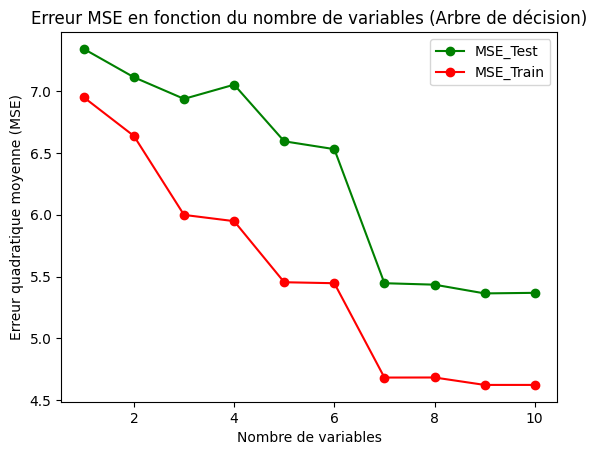

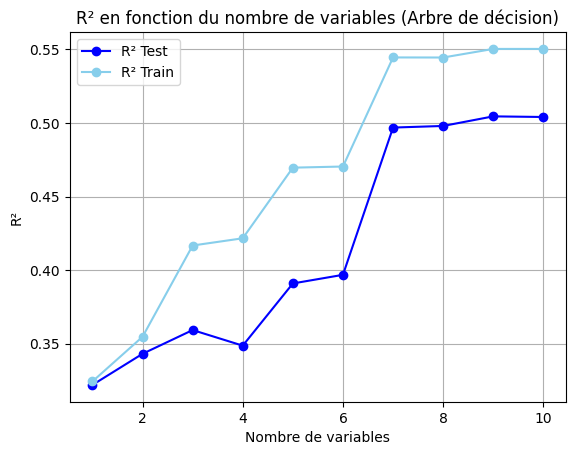

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = Abalone.drop(columns=['Rings'])
y = Abalone['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparamètres à tester
params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid = GridSearchCV(DecisionTreeRegressor(), params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("\n--------------------------------------------------------------------\n")
print("Meilleurs hyperparamètres :", best_params)
print("Erreur quadratique moyenne (MSE) :", mse)
print("R² du Meilleur modèle :", r2)
print("\n--------------------------------------------------------------------\n")

# Tracer l'erreur en fonction du nombre de variables
mse_test = []
mse_train = []
r2_test = []
r2_train = []

for n in range(1, X.shape[1] + 1):
    model = DecisionTreeRegressor(**best_params)
    model.fit(X_train.iloc[:, :n], y_train)
    y_pred = model.predict(X_train.iloc[:, :n])
    mse_train.append(mean_squared_error(y_train, y_pred))
    y_pred_n = model.predict(X_test.iloc[:, :n])
    mse_test.append(mean_squared_error(y_test, y_pred_n))
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_pred_n))

plt.plot(range(1, X.shape[1] + 1), mse_test, marker='o', color='g', label="MSE_Test")
plt.plot(range(1, X.shape[1] + 1), mse_train, marker='o', color='r', label="MSE_Train")
plt.xlabel('Nombre de variables')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.title('Erreur MSE en fonction du nombre de variables (Arbre de décision)')
plt.legend()
plt.show()

plt.plot(range(1, X.shape[1] + 1), r2_test, marker='o', color='b', label="R² Test")
plt.plot(range(1, X.shape[1] + 1), r2_train, marker='o', color='skyblue', label="R² Train")
plt.xlabel('Nombre de variables')
plt.ylabel('R²')
plt.title('R² en fonction du nombre de variables (Arbre de décision)')
plt.legend()
plt.grid(True)
plt.show()


Performance du modèle :

* MSE = 5.37 → Indique une erreur moyenne modérée, montrant un certain écart entre les prédictions et les valeurs réelles.

* R² = 0.50 → Le modèle explique environ 50% de la variance des données, indiquant une performance correcte mais perfectible.

* le modèle montre un surapprentissage ou l'écart entre l'erreur MSE sur les données d'entraînement et de test est significatif.

* Le modèle est optimal avec environ de 7 variables, ou R² Test se stabilise. mais puisque le modèle presente un surapprentissage on voit clairement l'ecart entre R² Train et celui du Test

# **2. Forêt Aléatoire (Random Forest)**


--------------------------------------------------------------------

Meilleurs hyperparamètres : {'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}
Erreur quadratique moyenne (MSE) : 4.802514880814748
R² du Meilleur modèle : 0.5563582729015408

--------------------------------------------------------------------



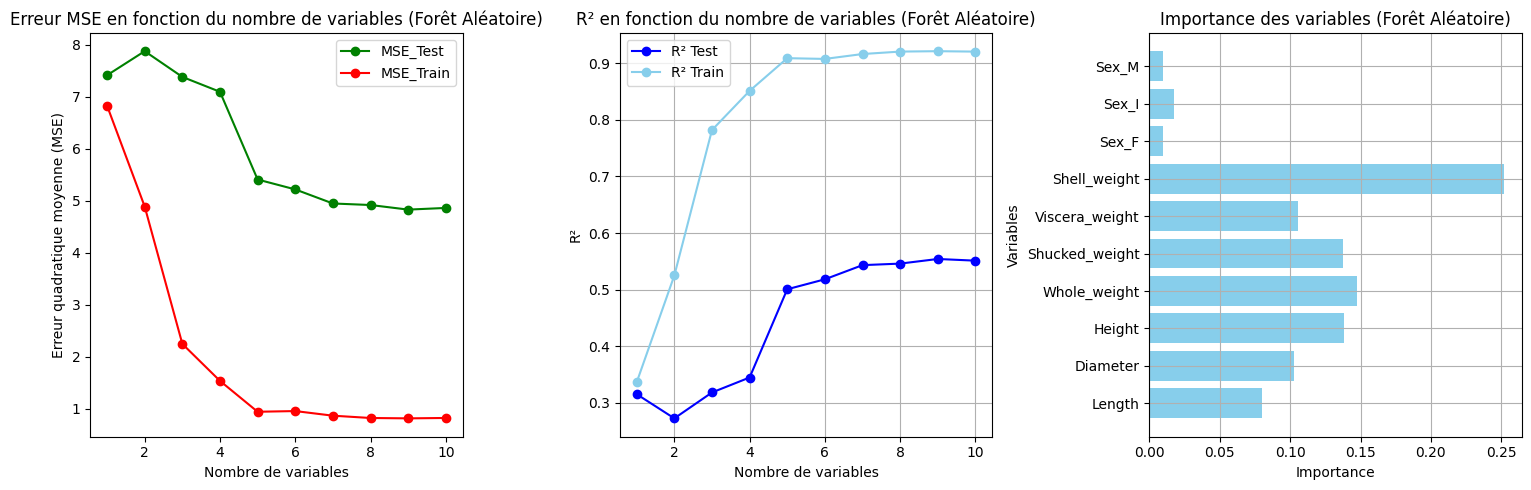

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Paramètres à tester
params = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10,15, None]}

# GridSearchCV
grid = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("\n--------------------------------------------------------------------\n")
print("Meilleurs hyperparamètres :", best_params)
print("Erreur quadratique moyenne (MSE) :", mse)
print("R² du Meilleur modèle :", r2)
print("\n--------------------------------------------------------------------\n")

# Tracer l'erreur en fonction du nombre de variables
mse_test = []
mse_train = []
r2_test = []
r2_train = []

for n in range(1, X.shape[1] + 1):
    model = RandomForestRegressor(**best_params)
    model.fit(X_train.iloc[:, :n], y_train)
    y_pred_n = model.predict(X_test.iloc[:, :n])
    y_pred = model.predict(X_train.iloc[:, :n])
    mse_train.append(mean_squared_error(y_train, y_pred))
    y_pred_n = model.predict(X_test.iloc[:, :n])
    mse_test.append(mean_squared_error(y_test, y_pred_n))
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_pred_n))

fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(range(1, X.shape[1] + 1), mse_test, marker='o', color='g', label="MSE_Test")
axes[0].plot(range(1, X.shape[1] + 1), mse_train, marker='o', color='r', label="MSE_Train")
axes[0].set_xlabel('Nombre de variables')
axes[0].set_ylabel('Erreur quadratique moyenne (MSE)')
axes[0].set_title('Erreur MSE en fonction du nombre de variables (Forêt Aléatoire)')
axes[0].legend()

axes[1].plot(range(1, X.shape[1] + 1), r2_test, marker='o', color='b', label="R² Test")
axes[1].plot(range(1, X.shape[1] + 1), r2_train, marker='o', color='skyblue', label="R² Train")
axes[1].set_xlabel('Nombre de variables')
axes[1].set_ylabel('R²')
axes[1].set_title('R² en fonction du nombre de variables (Forêt Aléatoire)')
axes[1].legend()
axes[1].grid(True)


# Importance des variables
feature_importances = best_model.feature_importances_
axes[2].barh(X.columns, feature_importances, color='skyblue')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Variables')
axes[2].set_title('Importance des variables (Forêt Aléatoire)')
axes[2].grid()

plt.tight_layout()
plt.show()



Performance du modèle :

* le modèle montre un surapprentissage ou l'écart entre l'erreur MSE sur les données d'entraînement et de test est significativement grand.

* Le modèle est optimal avec environ de 6 variables, ou R² Test se stabilise. mais puisque le modèle presente un surapprentissage on voit clairement l'ecart entre R² Train et celui du Test

* on constat que les variables les plus influent sur le modèle sont : `Shell_weight`, `Height` et `Whole_weight`


# **3. Bagging (BaggingRegressor)**


--------------------------------------------------------------------

Meilleurs hyperparamètres : {'max_samples': 0.5, 'n_estimators': 100}
Erreur quadratique moyenne (MSE) : 4.7973882775119625
R² du Meilleur modèle : 0.5568318529319708

--------------------------------------------------------------------



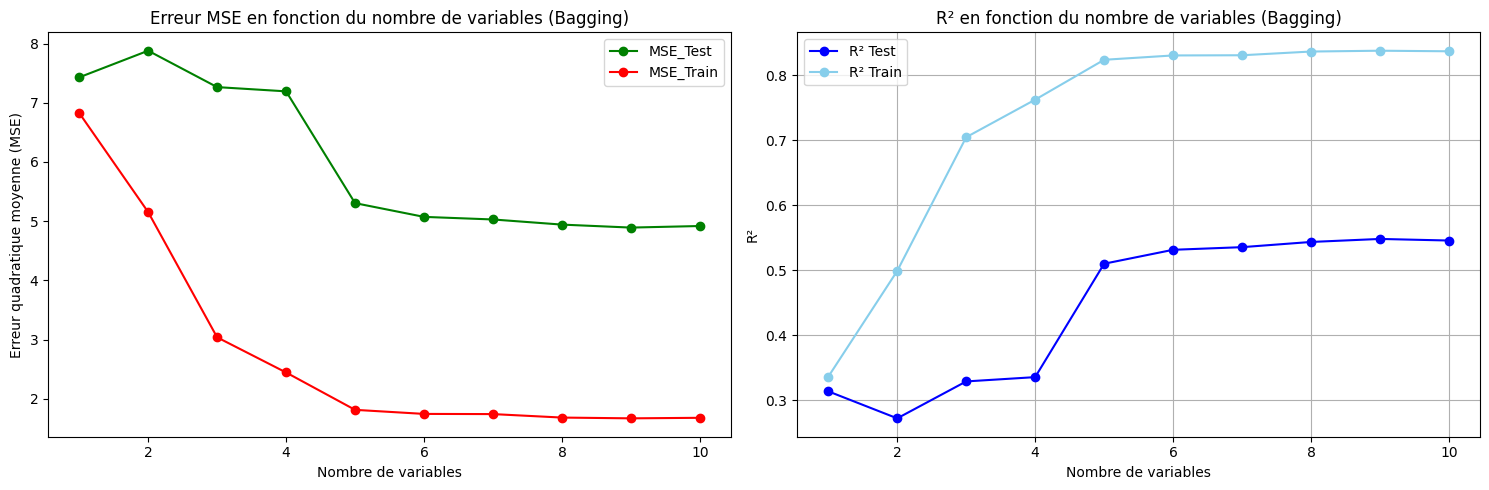

In [16]:
from sklearn.ensemble import BaggingRegressor

# Paramètres à tester
params = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.8, 1.0]}

# GridSearchCV
grid = GridSearchCV(BaggingRegressor(), params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("\n--------------------------------------------------------------------\n")
print("Meilleurs hyperparamètres :", best_params)
print("Erreur quadratique moyenne (MSE) :", mse)
print("R² du Meilleur modèle :", r2)
print("\n--------------------------------------------------------------------\n")

# Tracer l'erreur en fonction du nombre de variables
mse_test = []
mse_train = []
r2_test = []
r2_train = []

for n in range(1, X.shape[1] + 1):
    model = BaggingRegressor(**best_params)
    model.fit(X_train.iloc[:, :n], y_train)
    y_pred_n = model.predict(X_test.iloc[:, :n])
    y_pred = model.predict(X_train.iloc[:, :n])
    mse_train.append(mean_squared_error(y_train, y_pred))
    y_pred_n = model.predict(X_test.iloc[:, :n])
    mse_test.append(mean_squared_error(y_test, y_pred_n))
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_pred_n))

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(range(1, X.shape[1] + 1), mse_test, marker='o', color='g', label="MSE_Test")
axes[0].plot(range(1, X.shape[1] + 1), mse_train, marker='o', color='r', label="MSE_Train")
axes[0].set_xlabel('Nombre de variables')
axes[0].set_ylabel('Erreur quadratique moyenne (MSE)')
axes[0].set_title('Erreur MSE en fonction du nombre de variables (Bagging)')
axes[0].legend()

axes[1].plot(range(1, X.shape[1] + 1), r2_test, marker='o', color='b', label="R² Test")
axes[1].plot(range(1, X.shape[1] + 1), r2_train, marker='o', color='skyblue', label="R² Train")
axes[1].set_xlabel('Nombre de variables')
axes[1].set_ylabel('R²')
axes[1].set_title('R² en fonction du nombre de variables (Bagging)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



Performance du modèle :

* le modèle montre un surapprentissage ou l'écart entre l'erreur MSE sur les données d'entraînement et de test est significativement grand.

* Le modèle est optimal avec environ de 5 variables, ou R² Test se stabilise. mais puisque le modèle presente un surapprentissage on voit clairement l'ecart entre R² Train et celui du Test


# **4. Boosting (Gradient Boosting)**


--------------------------------------------------------------------

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'n_estimators': 100}
Erreur quadratique moyenne (MSE) : 5.049797670984103
R² du Meilleur modèle : 0.5335150403796154

--------------------------------------------------------------------



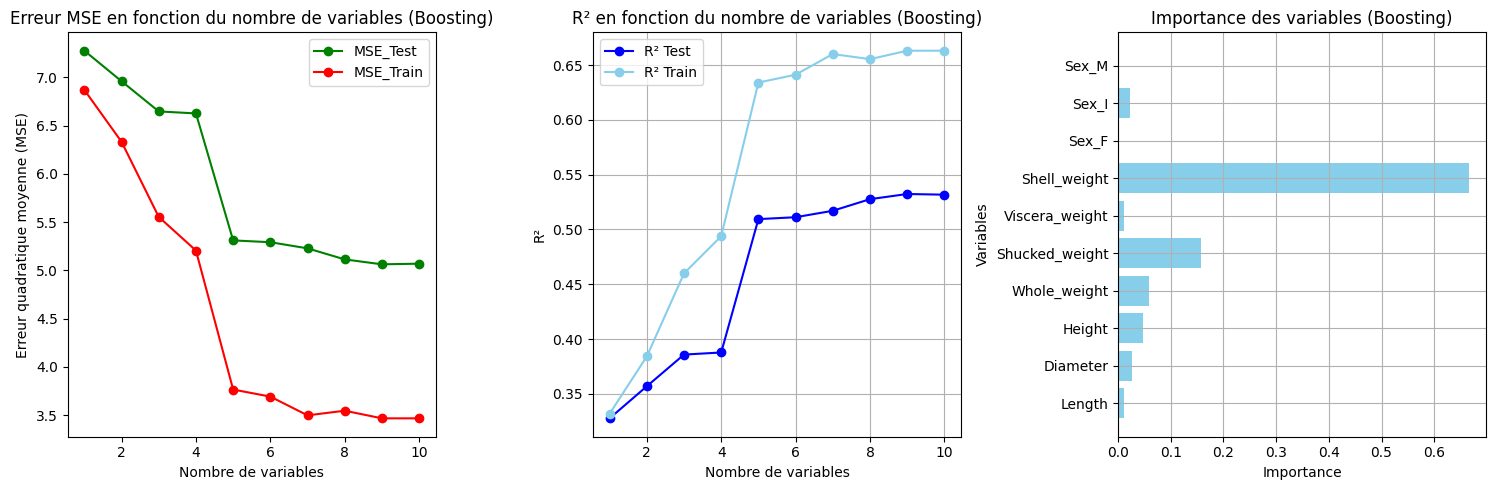

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Paramètres à tester
params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# GridSearchCV
grid = GridSearchCV(GradientBoostingRegressor(), params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("\n--------------------------------------------------------------------\n")
print("Meilleurs hyperparamètres :", best_params)
print("Erreur quadratique moyenne (MSE) :", mse)
print("R² du Meilleur modèle :", r2)
print("\n--------------------------------------------------------------------\n")

# Tracer l'erreur en fonction du nombre de variables
mse_test = []
mse_train = []
r2_test = []
r2_train = []

for n in range(1, X.shape[1] + 1):
    model = GradientBoostingRegressor(**best_params)
    model.fit(X_train.iloc[:, :n], y_train)
    y_pred_n = model.predict(X_test.iloc[:, :n])
    y_pred = model.predict(X_train.iloc[:, :n])
    mse_train.append(mean_squared_error(y_train, y_pred))
    y_pred_n = model.predict(X_test.iloc[:, :n])
    mse_test.append(mean_squared_error(y_test, y_pred_n))
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_pred_n))

fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(range(1, X.shape[1] + 1), mse_test, marker='o', color='g', label="MSE_Test")
axes[0].plot(range(1, X.shape[1] + 1), mse_train, marker='o', color='r', label="MSE_Train")
axes[0].set_xlabel('Nombre de variables')
axes[0].set_ylabel('Erreur quadratique moyenne (MSE)')
axes[0].set_title('Erreur MSE en fonction du nombre de variables (Boosting)')
axes[0].legend()

axes[1].plot(range(1, X.shape[1] + 1), r2_test, marker='o', color='b', label="R² Test")
axes[1].plot(range(1, X.shape[1] + 1), r2_train, marker='o', color='skyblue', label="R² Train")
axes[1].set_xlabel('Nombre de variables')
axes[1].set_ylabel('R²')
axes[1].set_title('R² en fonction du nombre de variables (Boosting)')
axes[1].legend()
axes[1].grid(True)


# Importance des variables
feature_importances = best_model.feature_importances_
axes[2].barh(X.columns, feature_importances, color='skyblue')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Variables')
axes[2].set_title('Importance des variables (Boosting)')
axes[2].grid()

plt.tight_layout()
plt.show()



Performance du modèle :

* le modèle montre un surapprentissage ou l'écart entre l'erreur MSE sur les données d'entraînement et de test est significativement grand.

* Le modèle est optimal avec environ de 5 variables, ou R² Test se stabilise. mais puisque le modèle presente un surapprentissage on voit clairement l'ecart entre R² Train et celui du Test

# **Comparaison entre les modèles : KNN, Arbre decision, Randomforest et SVM**

MAE KNN :  1.4545590433482811
MAE Arbre de Décision :  1.5740388438055668
MAE Forêt Aléatoire :  1.4531081585767855
MAE SVM :  1.446460657864307

-----------------------------------------------------------------

MSE KNN :  4.196539611360239
MSE Arbre de Décision :  4.825519596517747
MSE Forêt Aléatoire :  3.9763168760531835
MSE SVM :  4.440288747565204

-----------------------------------------------------------------

R² KNN :  0.577917627745592
R² Arbre de Décision :  0.5146556574505536
R² Forêt Aléatoire :  0.6000673375424759
R² SVM :  0.5534016638390803

-----------------------------------------------------------------------------

En terme de MAE, Le meilleur algorithme pour prédire l'âge des abalones est le SVM.
En terme de MSE,Le meilleur algorithme pour prédire l'âge des abalones est le Forêt Aléatoire.
En terme de R²,Le meilleur algorithme pour prédire l'âge des abalones est le Forêt Aléatoire.

*********************************************************************************

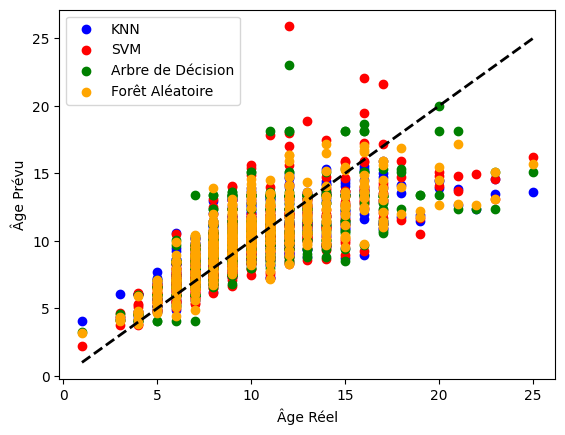

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt

# Séparation des caractéristiques (X) et de la cible (y)
X = Abalone.drop(columns=['Rings'])
y = Abalone['Rings']

# Division des données en ensembles d'entraînement et de test
X_disponible, X_non_disponible, y_disponible, y_non_disponible = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_disponible, y_disponible, test_size=0.2, random_state=1)

# Paramètres pour le modèle KNN
parameters_knn = {'n_neighbors': [20]}
knn_model = GridSearchCV(KNeighborsRegressor(), parameters_knn, cv=3, scoring='neg_mean_absolute_error')
knn_model.fit(X_train, y_train)

# Paramètres pour le modèle SVM
parameters_svm = {'kernel': ['poly'], 'C': [10], 'gamma': [2]}
svm_model = GridSearchCV(SVR(), parameters_svm, cv=3, scoring='neg_mean_absolute_error')
svm_model.fit(X_train, y_train)

# Paramètres pour l'arbre de décision
parameters_tree = {'max_depth': [6]}
tree_model = GridSearchCV(DecisionTreeRegressor(), parameters_tree, cv=3, scoring='neg_mean_absolute_error')
tree_model.fit(X_train, y_train)

# Paramètres pour la forêt aléatoire
parameters_rf = {'n_estimators': [100], 'max_features': ["sqrt"], 'max_depth': [10]}
rf_model = GridSearchCV(RandomForestRegressor(), parameters_rf, cv=3, scoring='neg_mean_absolute_error')
rf_model.fit(X_train, y_train)

# Prédictions des différents modèles
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calcul des erreurs absolues moyennes (MAE)
knn_mae = mean_absolute_error(y_test, knn_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Calcul des erreurs moyennes carrés (MsE)
knn_mse = mean_squared_error(y_test, knn_pred)
svm_mse = mean_squared_error(y_test, svm_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
# Calcul des R²
knn_r2 = r2_score(y_test, knn_pred)
svm_r2 = r2_score(y_test, svm_pred)
tree_r2 = r2_score(y_test, tree_pred)
rf_r2 = r2_score(y_test, rf_pred)


print("MAE KNN : ", knn_mae)
print("MAE Arbre de Décision : ", tree_mae)
print("MAE Forêt Aléatoire : ", rf_mae)
print("MAE SVM : ", svm_mae)
print("\n-----------------------------------------------------------------\n")
print("MSE KNN : ", knn_mse)
print("MSE Arbre de Décision : ", tree_mse)
print("MSE Forêt Aléatoire : ", rf_mse)
print("MSE SVM : ", svm_mse)
print("\n-----------------------------------------------------------------\n")
print("R² KNN : ", knn_r2)
print("R² Arbre de Décision : ", tree_r2)
print("R² Forêt Aléatoire : ", rf_r2)
print("R² SVM : ", svm_r2)
print("\n-----------------------------------------------------------------------------\n")


# Comparaison des modèles pour trouver le meilleur
models = {"KNN": knn_model, "SVM": svm_model, "Arbre de Décision": tree_model, "Forêt Aléatoire": rf_model}
meilleur_modele_nom_mae = min(models, key=lambda x: mean_absolute_error(y_test, models[x].predict(X_test)))
meilleur_modele_nom_mse = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test)))
meilleur_modele_nom_r2 = max(models, key=lambda x: r2_score(y_test, models[x].predict(X_test)))
print(f"En terme de MAE, Le meilleur algorithme pour prédire l'âge des abalones est le {meilleur_modele_nom_mae}.")
print(f"En terme de MSE,Le meilleur algorithme pour prédire l'âge des abalones est le {meilleur_modele_nom_mse}.")
print(f"En terme de R²,Le meilleur algorithme pour prédire l'âge des abalones est le {meilleur_modele_nom_r2}.")
print("\n************************************************************************************\n")

# Affichage des résultats sous forme de graphique
fig, ax = plt.subplots()
ax.scatter(y_test, knn_pred, color='blue', label='KNN')
ax.scatter(y_test, svm_pred, color='red', label='SVM')
ax.scatter(y_test, tree_pred, color='green', label='Arbre de Décision')
ax.scatter(y_test, rf_pred, color='orange', label='Forêt Aléatoire')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Âge Réel')
ax.set_ylabel('Âge Prévu')
ax.legend(loc='best')
plt.show()


Le bon modèle en terme de `MAE` est le `SVM` tnadis que en teme de `MSE` et `R²` le meilleur modèle est celui de `RandomForest` ce qui nous permet de dire que le modèle `SVM` est sensible des eurreurs pour les grand valeurs tandis que le `RandomForest` a des erreurs uniforme pour tout les valeurs.